In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = {
    'Date': ['16/12/2006']*16,
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00', '17:29:00', 
             '17:30:00', '17:31:00', '17:32:00', '17:33:00', '17:34:00', '17:35:00', 
             '17:36:00', '17:37:00', '17:38:00', '17:39:00'],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68, 235.02, 235.09, 235.22, 233.99, 
                233.86, 232.86, 232.78, 232.99, 232.91, 235.24, 237.14]
}

df = pd.DataFrame(data)

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['Voltage'] = scaler.fit_transform(df['Voltage'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(df['Voltage'].values, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Predict the values
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)
y = scaler.inverse_transform(y.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df.index[look_back:], y, label='Actual Voltage',marker='o')
plt.plot(df.index[look_back:], predicted, label='Predicted Voltage',marker='o')
plt.xlabel('Date & Time')
plt.ylabel('Voltage')
plt.title('LSTM Voltage Prediction over Time')
plt.legend()
plt.show()



Epoch 1/100


C:\Users\SEJAL\AppData\Local\Temp\ipykernel_19016\2975988926.py:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index if time-series modeling is desired
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Define features (X) and target (y)
x = data.index  # Dates for plotting on x-axis
y = data['Voltage'].values  # Voltage values, converted to NumPy array

# Ensure target is numeric
y = np.nan_to_num(y)  # Replace NaNs with zero or handle accordingly

# Plot the actual voltage over time
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Voltage',marker='o')
plt.xlabel('Date')
plt.ylabel('Voltage')
plt.title('Voltage over Time')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Test2.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index for time-series modeling
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Voltage'] = scaler.fit_transform(data['Voltage'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['Voltage'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Voltage', marker='o')
plt.plot(y_pred, label='Predicted Voltage', marker='x')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage: Actual vs. Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential  #type:ignore
from tensorflow.keras.layers import LSTM, Dense #type:ignore

# Load the dataset
data = {
    'Date': ['16/12/2006']*16,
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00', '17:29:00', 
             '17:30:00', '17:31:00', '17:32:00', '17:33:00', '17:34:00', '17:35:00', 
             '17:36:00', '17:37:00', '17:38:00', '17:39:00'],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68, 235.02, 235.09, 235.22, 233.99, 
                233.86, 232.86, 232.78, 232.99, 232.91, 235.24, 237.14]
}

df = pd.DataFrame(data)

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['Voltage'] = scaler.fit_transform(df['Voltage'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(df['Voltage'].values, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

# Predict the values
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)

# Plotting only the predicted results
plt.figure(figsize=(10, 6))
plt.plot(df.index[look_back:], predicted, label='Predicted Voltage', marker='o')
plt.xlabel('Date & Time')
plt.ylabel('Voltage')
plt.title('LSTM Voltage Prediction over Time')
plt.legend()
plt.show()


###dumping model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
data = pd.read_csv('Test1.csv')

# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Drop the 'Time' column if it's not needed
data.drop(columns=['Time'], inplace=True)

# Set the 'Date' column as the index for time-series modeling
data.set_index('Date', inplace=True)

# Ensure 'Voltage' column is numeric; convert if necessary
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Voltage'] = scaler.fit_transform(data['Voltage'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['Voltage'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model using pickle
with open('lstm_voltage_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler to ensure future data is scaled the same way
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# To use the model for future predictions, load it back using pickle
with open('lstm_voltage_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_test = loaded_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = loaded_scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Voltage', marker='o')
plt.plot(y_pred, label='Predicted Voltage', marker='x')
plt.xlabel('Date')
plt.ylabel('Voltage')
plt.title('Voltage: Actual vs. Predicted')
plt.legend()
plt.show()


### Code according to dataset by gunjan ###

C:\Users\SEJAL\AppData\Local\Temp\ipykernel_19016\1518587284.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0502 - val_loss: 0.0140
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0202 - val_loss: 0.0092
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - val_loss: 0.0069
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0065
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

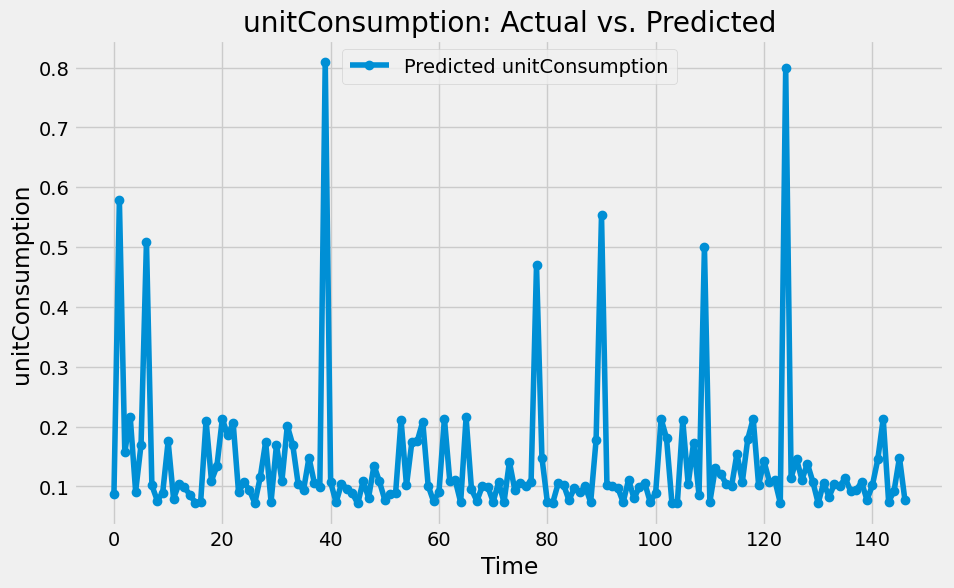

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import LSTM, Dense #type:ignore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Datasets\data.csv')

# Convert 'timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Set the 'timestamp' column as the index for time-series modeling
data.set_index('timestamp', inplace=True)

# Ensure 'unitConsumption' column is numeric; convert if necessary
data['unitConsumption'] = pd.to_numeric(data['unitConsumption'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['unitConsumption'] = scaler.fit_transform(data['unitConsumption'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['unitConsumption'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual unitConsumption', marker='o')
plt.plot(y_pred, label='Predicted unitConsumption', marker='o')
plt.xlabel('Time')
plt.ylabel('unitConsumption')
plt.title('unitConsumption: Actual vs. Predicted')
plt.legend()
plt.show()



### OUTPUT json ###

Epoch 1/10


C:\Users\SEJAL\AppData\Local\Temp\ipykernel_19016\3353628460.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
c:\Users\SEJAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0397 - val_loss: 0.0139
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - val_loss: 0.0097
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0064
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046 - val_loss: 0.0064
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - val_loss: 0.0062
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Predictions and actual values saved to output.json


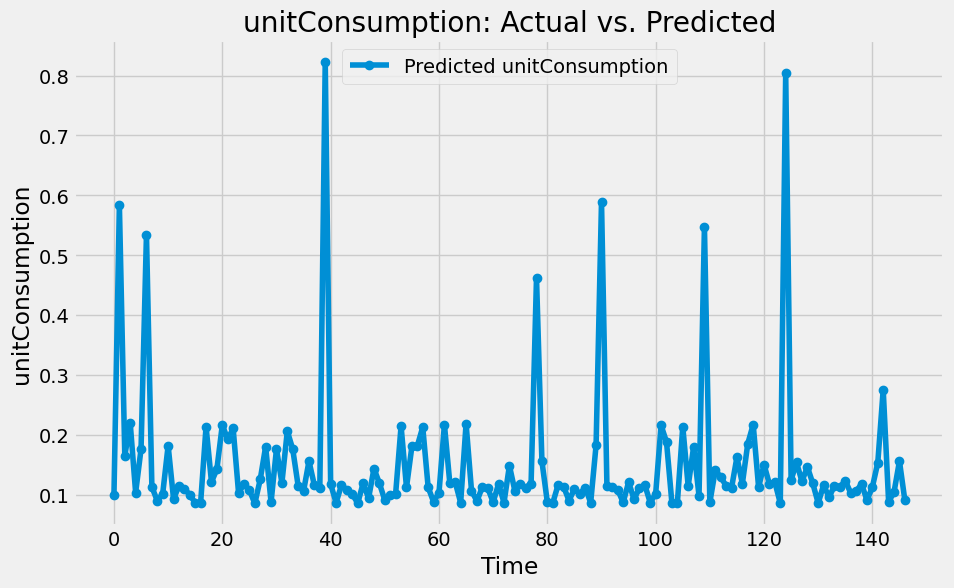

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import LSTM, Dense #type:ignore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import json

# Load the dataset
data = pd.read_csv('Datasets/data.csv')

# Convert 'timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Set the 'timestamp' column as the index for time-series modeling
data.set_index('timestamp', inplace=True)

# Ensure 'unitConsumption' column is numeric; convert if necessary
data['unitConsumption'] = pd.to_numeric(data['unitConsumption'], errors='coerce')

# Handle any missing values created during conversion
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['unitConsumption'] = scaler.fit_transform(data['unitConsumption'].values.reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]  # Corrected: Now accessing the data properly
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

# Specify the time step (window size)
time_step = 10  # Can be adjusted depending on how much past data you want to use for prediction
X, y = create_dataset(data['unitConsumption'].values, time_step)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual test data back to the original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Save predictions and actual values to a JSON file
output_data = {
    "actual": y_test.flatten().tolist(),
    "predicted": y_pred.flatten().tolist()
}

# Specify the output file path
output_file = 'output.json'

# Write to JSON file
with open(output_file, 'w') as f:
    json.dump(output_data, f, indent=4)

# Print success message
print(f"Predictions and actual values saved to {output_file}")

# Optionally, plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted unitConsumption', marker='o')
plt.xlabel('Time')
plt.ylabel('unitConsumption')
plt.title('unitConsumption: Actual vs. Predicted')
plt.legend()
plt.show()
